Мной был взят файл прямо из итогового проекта

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,4

In [7]:
hr.rename(index=str, columns={"sales": "department"}, inplace = True)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_int
0,0.38,0.53,2,157,3,0,1,0,sales,low,1000
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2000
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2000
3,0.72,0.87,5,223,5,0,1,0,sales,low,1000
4,0.37,0.52,2,159,3,0,1,0,sales,low,1000


In [8]:
hr = pd.read_csv('HR.csv')
hr[hr['salary'] == 'high'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high


In [18]:
def salary_int(table):
    for row in table:
        if table.salary == 'high':
            return 5000
        if table.salary == 'medium':
            return 2000
        if table.salary == 'low':
            return 1000

hr['salary_int'] = hr.apply(salary_int, axis = 1)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_int
0,0.38,0.53,2,157,3,0,1,0,sales,low,1000
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2000
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2000
3,0.72,0.87,5,223,5,0,1,0,sales,low,1000
4,0.37,0.52,2,159,3,0,1,0,sales,low,1000


Первая визуализация представляет корреляцию между всеми признаками таблицы для обнаружения связей между переменными. Хитмэп просто идеально для этого подходит

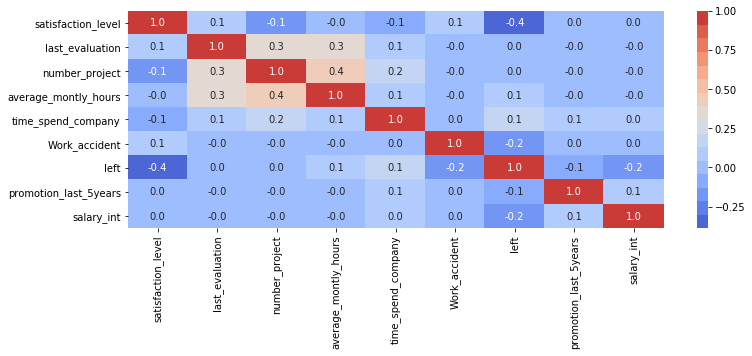

In [5]:
f, ax = plt.subplots()

sns.heatmap(hr.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

Второй график - box-plot. Здесь он отображает уровни удовлетворения различных отделов компании. В данном случае его удобство в том, что он позволяет определить и визуализировать значения описательной статистики и сравнить их с показателями по другим отделам

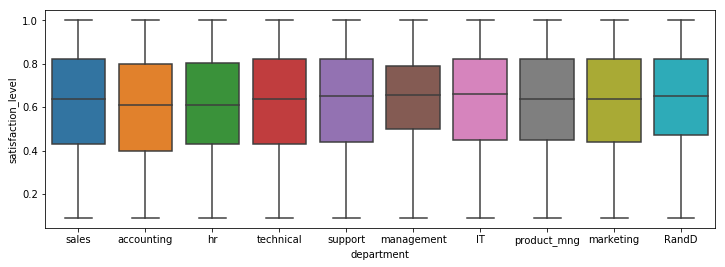

In [12]:
sns.boxplot(x="department", y="satisfaction_level", 
            data=hr)

In [14]:
hr_low_salary = hr[hr['salary'] == 'low']
hr_medium_salary = hr[hr['salary'] == 'medium']
hr_high_salary = hr[hr['salary'] == 'high']

На данном этапе мы начинаем углубляться в изучение работников компании. Третий график - гистограмма. Она была выбрана по причине того, что рассматривалась и не сравнивалась ни с кем более одна большая группа, а тут изображено ее распределение в зависимости от уровня удовлетворенности работой

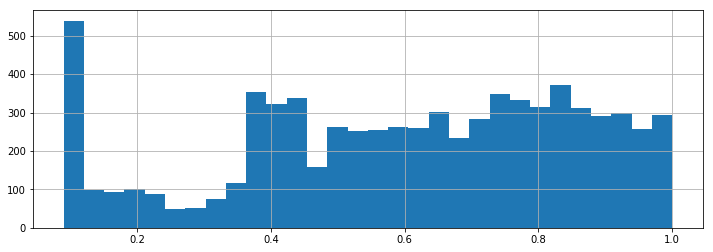

In [15]:
hr_low_salary.satisfaction_level.hist(bins = 30)

In [19]:
hr_saldept = hr.groupby(['department', 'salary']).count().sort_values(by = ['department', 'salary_int'], ascending = False).salary_int
hr_saldept

department   salary
technical    low       1372
             medium    1147
             high       201
support      low       1146
             medium     942
             high       141
sales        low       2099
             medium    1772
             high       269
product_mng  low        451
             medium     383
             high        68
marketing    low        402
             medium     376
             high        80
management   high       225
             medium     225
             low        180
hr           medium     359
             low        335
             high        45
accounting   low        358
             medium     335
             high        74
RandD        medium     372
             low        364
             high        51
IT           low        609
             medium     535
             high        83
Name: salary_int, dtype: int64

Как можно заметить из строки выше, мы выявили, кто сколько в каких отделах зарабатывает и, соответственно, визуализировали это ниже. График удобен тем, что здесь есть несколько признаков, которые сравниваются.

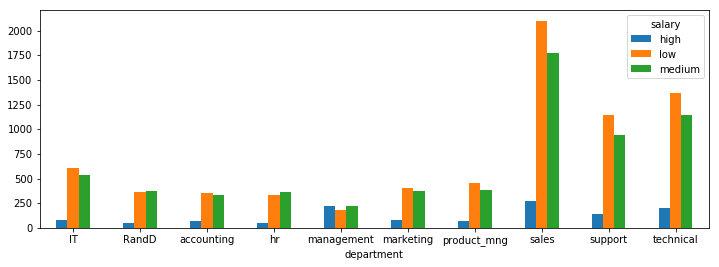

In [20]:
hr_saldept.unstack().plot(kind='bar', rot = 0)

В данном случае удобно использовать pairplot для сравнения нескольких потенциально взаимосвязанных критериев. Например, здесь хорошо заметно, что у покинувшие компанию сотрудники больше работали и были меньше удовлетворены работой, и еще то, что образовалось 2 группы людей, где в одной работают очень много, а в другой очень мало (центральный график).

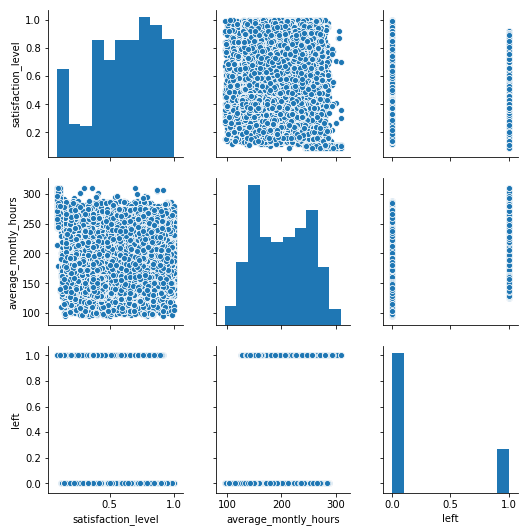

In [31]:
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'average_montly_hours', 'left']])
sns_plot